<a href="https://colab.research.google.com/github/randreove/TS/blob/exercises/notebooks/60_Forecasting%20II%20Deep%20Learning/1_Sequence%20Preprocessing/A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/randreove/TS.git

Cloning into 'TS'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 361 (delta 97), reused 323 (delta 62), pack-reused 0 (from 0)
Receiving objects: 100% (361/361), 27.15 MiB | 8.36 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (110/110), done.
Filtering content: 100% (17/17), 142.02 MiB | 34.14 MiB/s, done.


# Data Sequence

## Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv('/content/TS/notebooks/60_Forecasting II Deep Learning/data/precio_mercado_diario.csv', parse_dates=['datetime_utc'], index_col=0)
df = df.loc["2020":].copy()
df

,Mercado SPOT
datetime_utc,
2020-01-01 00:00:00+00:00,38.60
2020-01-01 01:00:00+00:00,36.55
2020-01-01 02:00:00+00:00,32.32
2020-01-01 03:00:00+00:00,30.85
2020-01-01 04:00:00+00:00,30.14
...,...
2023-08-04 17:00:00+00:00,70.00
2023-08-04 18:00:00+00:00,86.30
2023-08-04 19:00:00+00:00,94.00


## Data Preprocessing

### Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(df, shuffle=False, test_size=0.2)

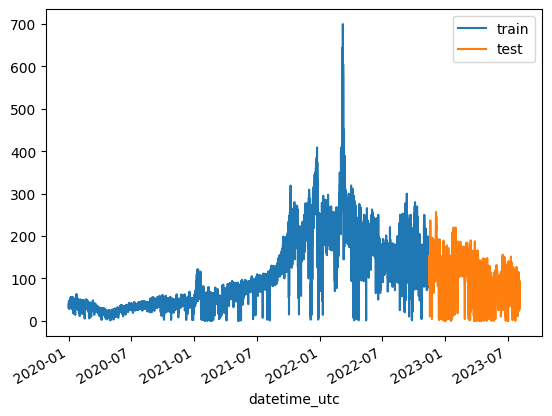

In [5]:
import matplotlib.pyplot as plt

train['Mercado SPOT'].plot(label='train')
test['Mercado SPOT'].plot(label='test')
plt.legend()

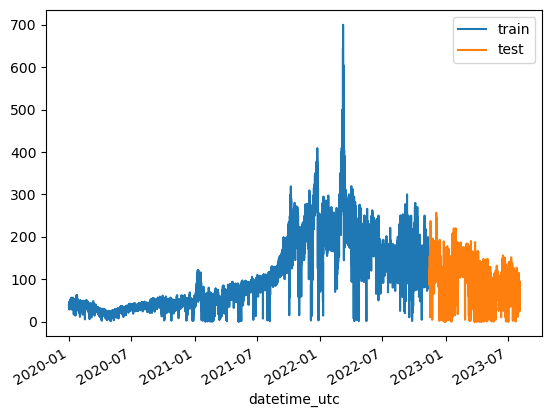

### Create Sequences

In [8]:
import numpy as np

In [6]:
def create_sequences(df, seq_len):
  Xs, ys = [], []

  for i in range(len(df)-seq_len):
    X = df.iloc[0+i:seq_len+i]
    Xs.append(X)

    y = df.iloc[seq_len+i]
    ys.append(y)

  Xs = np.array(Xs)
  ys = np.array(ys)

  return Xs, ys


In [9]:
X_test, y_test = create_sequences(test, seq_len=24)

In [10]:
X_train, y_train = create_sequences(train, seq_len=24)

array([[[ 38.6 ],
        [ 36.55],
        [ 32.32],
        ...,
        [ 42.9 ],
        [ 37.55],
        [ 35.4 ]],

       [[ 36.55],
        [ 32.32],
        [ 30.85],
        ...,
        [ 37.55],
        [ 35.4 ],
        [ 31.98]],

       [[ 32.32],
        [ 30.85],
        [ 30.14],
        ...,
        [ 35.4 ],
        [ 31.98],
        [ 30.5 ]],

       ...,

       [[158.26],
        [150.8 ],
        [155.57],
        ...,
        [148.67],
        [155.48],
        [155.63]],

       [[150.8 ],
        [155.57],
        [136.87],
        ...,
        [155.48],
        [155.63],
        [159.81]],

       [[155.57],
        [136.87],
        [149.29],
        ...,
        [155.63],
        [159.81],
        [148.67]]])

### Build LSTM Model

In [11]:
from keras import layers
from keras import Sequential

In [12]:
X_train.shape

(25222, 24, 1)

In [13]:
model = Sequential(layers=[
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.LSTM(units=50),
    layers.Dense(units=1)
])

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 14859.4307 - val_loss: 4011.5515
Epoch 2/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 9244.9150 - val_loss: 1685.2742
Epoch 3/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6203.0674 - val_loss: 687.7786
Epoch 4/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4112.1689 - val_loss: 299.1643
Epoch 5/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2941.2085 - val_loss: 177.1273
Epoch 6/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1917.3417 - val_loss: 146.3209
Epoch 7/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1298.1044 - val_loss: 153.6770
Epoch 8/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 999.4688 - val_loss: 139.9244
Epoch 9/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 771.7151 - val_loss: 130.5917
Epoch 10/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 551.9753 - val_loss: 136.0188
Epoch 11/50
789/789 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 555.1011 - val_loss: 136.43